<a href="https://colab.research.google.com/github/TejshreeRameshKarande/computer-vision/blob/main/ImgWarping%26HomographyUsingORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Total matches: 5000
Good matches after filtering: 134


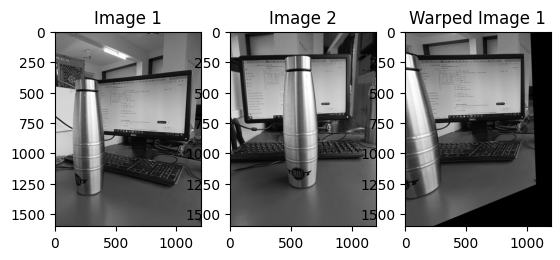

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load two images
img1 = cv2.imread('/content/drive/MyDrive/imagesclg/WhatsApp Image 2025-09-16 at 3.15.17 PM (2).jpeg', 0)   # query image
img2 = cv2.imread('/content/drive/MyDrive/imagesclg/WhatsApp Image 2025-09-16 at 3.15.17 PM (1).jpeg', 0)   # train image

# Step 2: Detect ORB features and descriptors (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create(5000) #creates an ORB detector that will find up to 5000 keypoints
kp1, des1 = orb.detectAndCompute(img1, None) #Detects keypoints (kp1, kp2) — interest points in the image.
kp2, des2 = orb.detectAndCompute(img2, None) #Computes descriptors (des1, des2) — feature vectors describing the local patches around the keypoints.

# Step 3: Match features using Brute Force
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)

# Step 4: Apply Lowe's ratio test to keep only good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print("Total matches:", len(matches))
print("Good matches after filtering:", len(good_matches))

# Step 5: Extract matched points
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Step 6: Find Homography using RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Step 7: Warp image1 to align with image2
height, width = img2.shape
warped_img = cv2.warpPerspective(img1, H, (width, height))

# Step 8: Show results
plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(img1, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(img2, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Warped Image 1")
plt.imshow(warped_img, cmap='gray')

plt.show()